y_pred =  [13.271 18.718 10.675 15.882 24.568  7.197 30.73  26.68  23.842 22.499
 20.847 17.374 26.931 20.225 20.591 18.766 13.377 17.297 20.574  9.811
 26.61   7.665 11.623 25.014 21.511 11.093  9.076 19.745 25.418 32.45
 13.254 21.426 27.088 16.766 18.739 23.514 17.069 15.025 28.357 33.301
 12.461 18.535 14.475 10.875 17.166 20.55  24.959 15.54  20.352 14.779
  8.494 11.023  7.617 18.623 19.116  9.643 14.001 18.533 32.51   7.493
 21.538 20.383 10.909 24.217 33.565 26.714 26.238 13.137  7.684 28.139
 16.778 25.408 17.708 19.241 15.823 31.985 10.59  19.478 30.49  31.986
 12.995 15.583 16.147 21.834 18.738 13.272 14.597 18.724 22.343 10.951
 32.283 24.332 16.689 24.394 15.818 28.705 28.607 18.92  26.75  21.463
 17.143 26.861 14.161  9.813 10.958 30.089 15.029]
y_test =  [13.8 19.2 11.1 16.2 19.   8.1 30.7 27.4 24.2 22.3 22.2 15.6 28.2 21.5
 20.  18.8 13.8 17.2 19.2 10.8 27.   8.7 12.3 25.1 22.2 11.2  9.5 20.
 25.1 31.8 13.6 21.7 27.4 18.1 17.9 22.9 16.8 15.2 29.1 33.1 13.2 16.3
 15.3 11

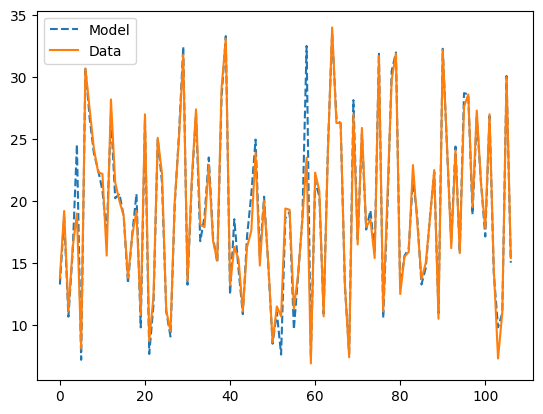

Mean Squared Error: 1.6899220186915906
R-squared: 0.9620459978424112

Feature Importances:
            Feature    Importance
1           MaxTemp  9.874045e-01
9       Humidity3pm  3.286792e-03
14          Temp9am  8.510946e-04
4          Sunshine  7.430377e-04
3       Evaporation  7.325607e-04
..              ...           ...
64    WindDir3pm_SW  1.677691e-06
68   WindDir3pm_nan  5.026110e-07
50   WindDir9am_WSW  3.419457e-07
34  WindGustDir_nan  2.597878e-07
33  WindGustDir_WSW  1.545021e-07

[69 rows x 2 columns]


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report


df = pd.read_csv('weather.csv')

# Convert categorical features to numerical
df['RainTomorrow'] = df['RainTomorrow'].map({'No': 0, 'Yes': 1})
df['RainToday'] = df['RainToday'].map({'No': 0, 'Yes': 1})

# Identify the categorical columns you want to one-hot encode
categorical_cols = ['WindGustDir', 'WindDir9am', 'WindDir3pm']

# Create a OneHotEncoder object
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit and transform the categorical columns
encoded_data = encoder.fit_transform(df[categorical_cols])

# Get the feature names for the new encoded columns
feature_names = encoder.get_feature_names_out(categorical_cols)

# Create a new DataFrame with the one-hot encoded data
encoded_df = pd.DataFrame(encoded_data, columns=feature_names)

# Concatenate the one-hot encoded DataFrame with the original DataFrame
df_encoded = pd.concat([df.drop(categorical_cols, axis=1), encoded_df], axis=1)

# Separate features (X) and target (y)
X = df_encoded.drop(columns = ['Temp3pm'])# all columns except the rain tmr
y = df_encoded['Temp3pm'] # last

# Handle missing values
X = X.dropna()
y = y.loc[X.index] # y only has rows corresponding to row indices of X

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('y_pred = ' , y_pred)
print('y_test = ' , y_test.to_numpy())
plt.plot(y_pred, '--', label='Model')
plt.plot(y_test.to_numpy(), label='Data')
plt.legend()
plt.show()

# Evaluate the regression model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
# Get feature importances
importances = model.feature_importances_
# Create a DataFrame to store feature names and their importances
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
# Sort the DataFrame by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
# Print the feature importances
print("\nFeature Importances:")
print(feature_importances)

# Neural Operators

Quinn Heng-Martin, Brandt Benfield; Colorado State University 2025

## Introduction

Neural Networks (NNs) are often described as universal function approximators, mapping an arbitrary set of inputs to outputs. This is certainly a very useful task, however in physics and engineering we are often interested in examining systems that produce different functions characterized by the same underlying behavior, depending on some initial or boundary conditions. It is the underlying behaviour we are interested in, not the particular function. That is, we seek to find mappings from functions to functions. This actually expands our problem space more than one might think: since there are an infinite number of functions that are completely unrelated (the family $\delta(x-x_0)$ for example), our parameter space is actually *infinite dimensional*. This might seem an insurmountable challenge, but NNs provide a nice starting point. This function-to-function mapping is precisely what an operator is, so a NN-derived architecture to solve these problems, naturally, is called a Neural Operator (NO). NOs were originally proposed by researchers at Caltech in 2020 [[1](https://arxiv.org/abs/2010.08895)] [[2](https://arxiv.org/abs/2108.08481)] - We seek to use the NO library published by the this team ([arxiv](https://arxiv.org/abs/2412.10354)) to create short- to medium-term weather forecasts for Colorado (a conveniently rectangular state).

### On the Technical Details
 ... how a NO works... 

 A particularly popular implementation of Neural Operators is the Fourier Neural Operator, as laid out by the same team.

 ... specifics about FNOs...

### The Gameplan (Methodology):

All training data is taken from the [
ERA5 hourly data on single levels from 1940 to present](https://doi.org/10.24381/cds.adbb2d47) and externally converted to CSV format for communicative/hand-in purposes.

In [28]:
# Neural Operator Import Options:
# pip install neuraloperator
#!pip install git+https://github.com/neuraloperator/neuraloperator.git


In [5]:
from neuralop.training import Trainer
from neuralop.models import FNO
import torch
import pandas as pd
import numpy as np
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader

# Dataset Preparation
class WeatherTensorDataset(Dataset):          # This class is a custom dataset loader that will load preprocessed
    def __init__(self, data_path):            # weather data (saved as a .pt file) into PyTorch’s data pipeline.
        self.samples = torch.load(data_path)

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        #return {'x': input_tensor, 'y': target_tensor}  # (input, target)              I don't think this line was right, delete?
        return {'x': self.samples[idx][0], 'y': self.samples[idx][1]}

In [6]:
# Load and clean the CSV file
df = pd.read_csv('data2022/accum_data.csv')

# Grid creation
times = sorted(df['valid_time'].unique()) # Get unique times

input_vars = ['u10', 'v10', 'surface_pressure', 'u10n', 'v10n']
output_var = 'surface_temperature'

grids = []

# Process the data for each time step
for time in tqdm(times):   # tqdm(times) progress bar for visualization
    slice_df = df[df['valid_time'] == time] # Get data for the current time step

    lat_vals = sorted(slice_df['latitude'].unique()) # Unique lat
    lon_vals = sorted(slice_df['longitude'].unique()) # Unique long

    H = len(lat_vals) # Height (number of latitude values)
    W = len(lon_vals)  # Width (number of longitude values)

    # Build 2D grid for each input variable
    input_channels = []
    for var in input_vars:
        pivot = slice_df.pivot(index='latitude', columns='longitude', values=var)
        grid = pivot.to_numpy() # Creates a 2D grid using pandas
        input_channels.append(grid)

    # Build target grid
    target_pivot = slice_df.pivot(index='latitude', columns='longitude', values=output_var)
    target_grid = target_pivot.to_numpy()

    # Stack into tensors
    input_tensor = torch.tensor(np.stack(input_channels), dtype=torch.float32)  # Shape: [C, H, W]  (C is the # of input variables, H is the # of lat points, and W is the # of long points)
    target_tensor = torch.tensor(target_grid[np.newaxis, :, :], dtype=torch.float32)  # Shape: [1, H, W]

    grids.append((input_tensor, target_tensor))

# Save the dataset to a file
torch.save(grids, 'weather_dataset.pt')  # List of (input, target) pairs

100%|██████████| 1460/1460 [00:49<00:00, 29.29it/s]


In [7]:
# Dataset Splitting
full_dataset = WeatherTensorDataset('weather_dataset.pt')
train_size = int(0.8 * len(full_dataset)) #80% for train
test_size = len(full_dataset) - train_size

train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

# Model Setup
in_channels = 5 # # of input
out_channels = 1 # # of output

# Initialize the model
model = FNO(n_modes=(12, 12), hidden_channels=32, in_channels=in_channels, out_channels=out_channels)

# Set device to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Initialize optimizer and scheduler
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)  # Adam optimizer with learning rate 0.001
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5) # Learning rate scheduler

# Training Setup
trainer = Trainer(model=model, n_epochs=10, device=device)

# Wrap the test_loader in a dictionary
test_loaders = {'test': test_loader}

In [ ]:
# Train the model
#trainer.train(train_loader, test_loaders, optimizer, scheduler)

In [8]:
folder = 'data2022/'
dfs = [pd.read_csv(folder+file) for file in ('accum_data.csv', 'instantaneous_data.csv', 'max_data.csv')]
[print(df.shape) for df in dfs]
dff = pd.concat(dfs,axis=1)
dff.shape, dff.head()

(197100, 10)
(197100, 10)
(197100, 10)


((197100, 30),
             valid_time  latitude  longitude       u10       v10  \
 0  2022-01-01 03:00:00      41.0     -109.0  0.694458 -0.103119   
 1  2022-01-01 03:00:00      41.0     -108.5  0.498169  0.364655   
 2  2022-01-01 03:00:00      41.0     -108.0 -0.283081  0.928131   
 3  2022-01-01 03:00:00      41.0     -107.5 -1.179565  1.212311   
 4  2022-01-01 03:00:00      41.0     -107.0 -0.895386  0.902740   
 
    surface_dewpoint  surface_temperature  surface_pressure      u10n  \
 0         261.02032            262.44580           77215.0  0.223984   
 1         260.49298            261.94580           77910.0  0.170273   
 2         260.55157            262.17627           77852.0 -0.130508   
 3         259.16290            261.19970           75851.0 -0.657852   
 4         258.49884            260.38330           73532.0 -0.682266   
 
        v10n  ...           valid_time  latitude  longitude       u10  \
 0  0.018707  ...  2022-01-01 03:00:00      41.0     -109.0  0

In [9]:
df_sorted = dfs[1].groupby(['valid_time','latitude','longitude']).agg(lambda x:x)

In [10]:
[group.pivot(index='latitude', columns='longitude',
             values=['u10', 'v10', 'surface_dewpoint', 'surface_temperature', 'surface_pressure', 'u10n', 'v10n'])
 for _, group in dfs[1].groupby(['valid_time'])][0].T


latitude            37.0      37.5      38.0      38.5      39.0      39.5  \
     longitude                                                               
u10  -109.0     0.801880  0.497192  0.071411  0.252075 -0.784058 -1.430542   
     -108.5     0.364380  0.071411  0.498169  0.855591 -0.354370 -1.091675   
     -108.0    -0.715698 -0.036987  1.027466  1.060669  0.084106 -0.411987   
     -107.5    -0.524292  0.555786  1.306763  1.032349  0.590942  0.215942   
     -107.0     0.089966  1.087036  1.072388  1.101685  1.027466  0.724731   
...                  ...       ...       ...       ...       ...       ...   
v10n -104.0     2.508942 -0.862152 -4.950043 -7.416840 -5.509613 -3.632660   
     -103.5     3.095856 -1.234222 -5.412933 -7.416840 -6.391449 -4.229340   
     -103.0     2.418121 -1.999847 -5.101410 -6.658050 -6.350433 -4.705902   
     -102.5     1.463043 -2.343597 -5.061371 -5.993011 -6.081879 -4.845550   
     -102.0    -0.115082 -3.473480 -5.395355 -6.110199 -5.892425 -5.337738   

latitude            40.0      40.5      41.0  
     longitude                                
u10  -109.0    -1.301636 -0.386597  0.694458  
     -108.5    -1.436401 -0.661987  0.498169  
     -108.0    -1.176636 -0.729370 -0.283081  
     -107.5    -0.873901 -1.517456 -1.179565  
     -107.0     0.013794 -0.879761 -0.895386  
...                  ...       ...       ...  
v10n -104.0    -2.436371 -2.205902 -1.886566  
     -103.5    -3.119965 -2.894379 -2.670746  
     -103.0    -3.897308 -3.553558 -3.447113  
     -102.5    -4.495941 -4.395355 -4.130707  
     -102.0    -5.339691 -5.312347 -5.022308  

[105 rows x 9 columns]

## Second Go Round

In [11]:
from itertools import pairwise

tensors = [t[0] for t in grids]
data_block = torch.stack(tensors, stackdim:=1)
chunks = data_block.split(20,stackdim)
torch.save(tuple(pairwise(chunks)), 'weather_chunks.pt')

# Dataset Splitting
full_dataset = WeatherTensorDataset('weather_chunks.pt')

train_size = int(0.8 * len(full_dataset)) #80% for train
test_size = len(full_dataset) - train_size

train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

train_dataset[0]['x'].shape # C x T x H x W, where T is the number of observation times

torch.Size([5, 20, 9, 15])

In [12]:
# Model Setup
in_channels = len(input_vars) # # of input
out_channels = len(output_vars:=input_vars) # # of output

# Initialize the model
model = FNO(n_modes=(12, 12, 12), hidden_channels=32, in_channels=in_channels, out_channels=out_channels)

# Set device to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Initialize optimizer and scheduler
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)  # Adam optimizer with learning rate 0.001
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5) # Learning rate scheduler

# Training Setup
trainer = Trainer(model=model, n_epochs=10, eval_interval=5, device=device, verbose=True)

# Wrap the test_loader in a dictionary
test_loaders = {'test': test_loader}

trainer.train(train_loader, test_loaders, optimizer, scheduler)

Training on 57 samples
Testing on [15] samples         on resolutions ['test'].
Raw outputs of shape torch.Size([1, 5, 20, 9, 15])
[0] time=17.46, avg_loss=4054.5170, train_err=4054.5170
Eval: test_l2=942.2747
[5] time=16.32, avg_loss=641.3745, train_err=641.3745
Eval: test_l2=366.5128


{'train_err': 556.0002830906918,
 'avg_loss': 556.0002830906918,
 'avg_lasso_loss': None,
 'epoch_train_time': 16.44733922799992}

In [ ]:
#torch.save(model.state_dict(), 'MondayMorningModel.pt')

In [ ]:
model.forward(test_dataset[0]['x'][:,-1,:,:].unsqueeze(0).unsqueeze(0))

RuntimeError: Given groups=1, weight of size [64, 8, 1], expected input[1, 4, 675] to have 8 channels, but got 4 channels instead

In [55]:
out = model(test_dataset[0]['x'].unsqueeze(0))
prediction = out.squeeze()[2,:,1,1]
test = test_dataset[0]['y'][2,:,1,1]
prediction,test

(tensor([3103.1250, 3105.5190, 3128.3618, 3137.9329, 3136.9014, 3131.4380,
         3141.0750, 3135.9158, 3130.0901, 3117.6890, 3126.0916, 3128.9338,
         3122.9734, 3111.7693, 3117.8486, 3119.5728, 3124.4333, 3124.2344,
         3138.3450, 3138.8315], grad_fn=<SelectBackward0>),
 tensor([78368.9375, 78501.1875, 78720.1875, 78562.4375, 78514.8750, 78504.5000,
         78673.2500, 78487.8125, 78263.5625, 78130.5000, 78081.0000, 77709.0000,
         77457.5625, 77330.0000, 77300.6875, 77135.3750, 77193.7500, 77416.5625,
         77623.8750, 77686.8125]))

In [24]:
#please don't remove I need them every time I pull from main
#!apt-get install -y libeccodes0 libeccodes-dev
#!pip install cfgrib xarray

In [27]:
import xarray as xr

# Load GRIB (or grb) file (from what I found they act the same)
ds = xr.open_dataset('CaribbeanWeatherTest.wind.7days.grb', engine='cfgrib')

# Inspect the dataset
print(ds)
ds.variables.keys()

<xarray.Dataset> Size: 158kB
Dimensions:            (step: 27, latitude: 22, longitude: 33)
Coordinates:
    time               datetime64[ns] 8B ...
  * step               (step) timedelta64[ns] 216B 0 days 06:00:00 ... 6 days...
    heightAboveGround  float64 8B ...
  * latitude           (latitude) float64 176B 9.0 10.0 11.0 ... 28.0 29.0 30.0
  * longitude          (longitude) float64 264B 263.0 264.2 ... 301.8 303.0
    valid_time         (step) datetime64[ns] 216B ...
Data variables:
    u10                (step, latitude, longitude) float32 78kB ...
    v10                (step, latitude, longitude) float32 78kB ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2025-05-05T19:30 GRIB to CDM+CF via cfgrib-0.9.1...


/usr/local/lib/python3.11/dist-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


KeysView(Frozen({'time': <xarray.Variable ()> Size: 8B
[1 values with dtype=datetime64[ns]]
Attributes:
    long_name:      initial time of forecast
    standard_name:  forecast_reference_time, 'step': <xarray.IndexVariable 'step' (step: 27)> Size: 216B
array([ 21600000000000,  43200000000000,  64800000000000,  86400000000000,
       108000000000000, 129600000000000, 151200000000000, 172800000000000,
       194400000000000, 216000000000000, 237600000000000, 259200000000000,
       280800000000000, 302400000000000, 324000000000000, 345600000000000,
       367200000000000, 388800000000000, 410400000000000, 432000000000000,
       453600000000000, 475200000000000, 496800000000000, 518400000000000,
       540000000000000, 561600000000000, 583200000000000],
      dtype='timedelta64[ns]')
Attributes:
    long_name:      time since forecast_reference_time
    standard_name:  forecast_period, 'heightAboveGround': <xarray.Variable ()> Size: 8B
[1 values with dtype=float64]
Attributes:
    long_

In [23]:
# For example, if 'time' is a variable:
time = ds['time']
print(time)

<xarray.DataArray 'time' ()> Size: 8B
[1 values with dtype=datetime64[ns]]
Coordinates:
    time               datetime64[ns] 8B ...
    heightAboveGround  float64 8B ...
Attributes:
    long_name:      initial time of forecast
    standard_name:  forecast_reference_time
